In [11]:
x=c(10,20,30,40,50,60,70)
y=c(30,40,50,80,90,100,120)
dataA=data.frame(x,y)
dataA

x,y
<dbl>,<dbl>
10,30
20,40
30,50
40,80
50,90
60,100
70,120


In [12]:
model= lm (y~x, data=dataA)

In [13]:
model_prediction=predict(model)
model_prediction

1         2         3         4         5         6         7 
 26.78571  42.14286  57.50000  72.85714  88.21429 103.57143 118.92857

In [14]:
dataA$prediction=model_prediction
dataA

x,y,prediction
<dbl>,<dbl>,<dbl>
10,30,26.78571
20,40,42.14286
30,50,57.50000
40,80,72.85714
50,90,88.21429
60,100,103.57143
70,120,118.92857


In [15]:
dataA$residual= dataA$y - dataA$prediction
dataA

x,y,prediction,residual
<dbl>,<dbl>,<dbl>,<dbl>
10,30,26.78571,3.214286
20,40,42.14286,-2.142857
30,50,57.50000,-7.500000
40,80,72.85714,7.142857
50,90,88.21429,1.785714
60,100,103.57143,-3.571429
70,120,118.92857,1.071429


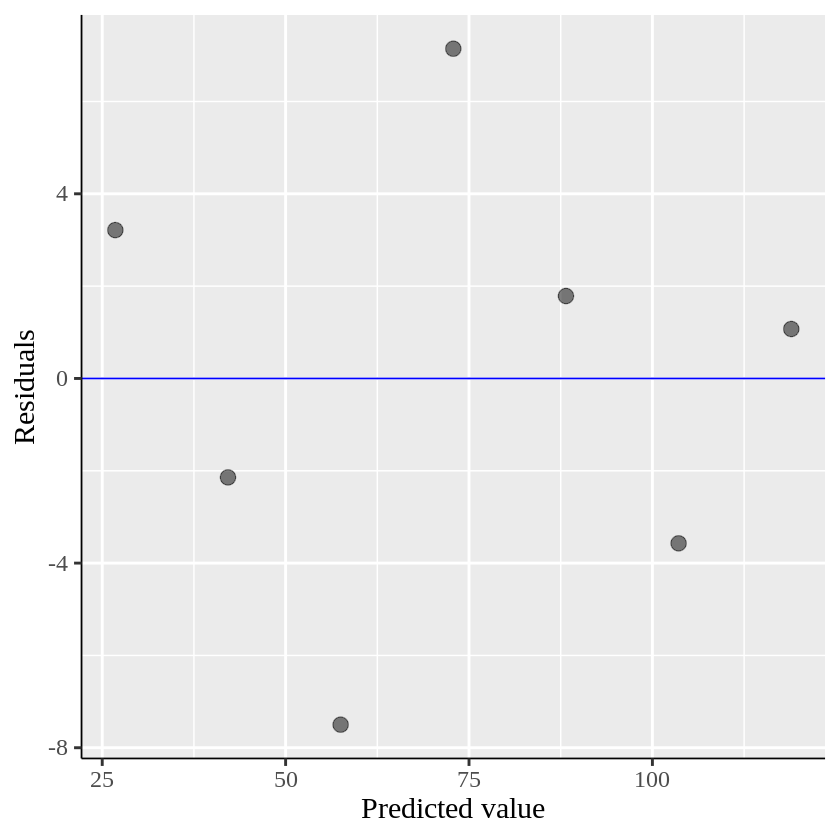

In [16]:
library(ggplot2)

ggplot(data=dataA, aes(x=prediction, y=residual))+
  geom_point(alpha=0.5, size=4) +
  geom_hline(yintercept=0, linetype="solid", color = "Blue") +
  labs(y="Residuals", x="Predicted value") +
  theme_classic(base_size=18, base_family="serif")+
  theme_grey(base_size=18, base_family="serif")+
  theme(legend.position="bottom",
        legend.title=element_blank(),
        legend.key=element_rect(color=alpha("grey",.05), fill=alpha("grey",.05)),
        legend.background= element_rect(fill=alpha("grey",.05)),
        axis.line=element_line(linewidth=0.5, colour="black"))

# Non linear model

In [17]:
x=c(10,20,30,40,50,60,70)
y=c(30,40,50,70,60,30,20)
dataB=data.frame(x,y)
dataB

x,y
<dbl>,<dbl>
10,30
20,40
30,50
40,70
50,60
60,30
70,20


In [9]:
# Linear model
summary(lm(y~x, data=dataB))


Call:
lm(formula = y ~ x, data = dataB)

Residuals:
      1       2       3       4       5       6       7 
-17.143  -5.714   5.714  27.143  18.571 -10.000 -18.571 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  48.5714    16.4130   2.959   0.0315 *
x            -0.1429     0.3670  -0.389   0.7131  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.42 on 5 degrees of freedom
Multiple R-squared:  0.02941,	Adjusted R-squared:  -0.1647 
F-statistic: 0.1515 on 1 and 5 DF,  p-value: 0.7131


In [10]:
# Non-linear model (Quadratic model)
summary(lm(y~poly(x,2, raw=TRUE), data=dataB))


Call:
lm(formula = y ~ poly(x, 2, raw = TRUE), data = dataB)

Residuals:
      1       2       3       4       5       6       7 
  4.286  -5.714  -7.143  10.000   5.714 -10.000   2.857 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)             -2.85714   14.42786  -0.198   0.8527  
poly(x, 2, raw = TRUE)1  3.28571    0.82685   3.974   0.0165 *
poly(x, 2, raw = TRUE)2 -0.04286    0.01010  -4.243   0.0132 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.258 on 4 degrees of freedom
Multiple R-squared:  0.8235,	Adjusted R-squared:  0.7353 
F-statistic: 9.333 on 2 and 4 DF,  p-value: 0.03114


In [18]:
model= lm(y ~ x, data=dataB)

In [19]:
model_prediction=predict(model)
model_prediction

1        2        3        4        5        6        7 
47.14286 45.71429 44.28571 42.85714 41.42857 40.00000 38.57143

In [20]:
dataB$prediction=model_prediction
dataB

x,y,prediction
<dbl>,<dbl>,<dbl>
10,30,47.14286
20,40,45.71429
30,50,44.28571
40,70,42.85714
50,60,41.42857
60,30,40.00000
70,20,38.57143


In [21]:
dataB$residual= dataB$y - dataB$prediction
dataB

x,y,prediction,residual
<dbl>,<dbl>,<dbl>,<dbl>
10,30,47.14286,-17.142857
20,40,45.71429,-5.714286
30,50,44.28571,5.714286
40,70,42.85714,27.142857
50,60,41.42857,18.571429
60,30,40.00000,-10.000000
70,20,38.57143,-18.571429


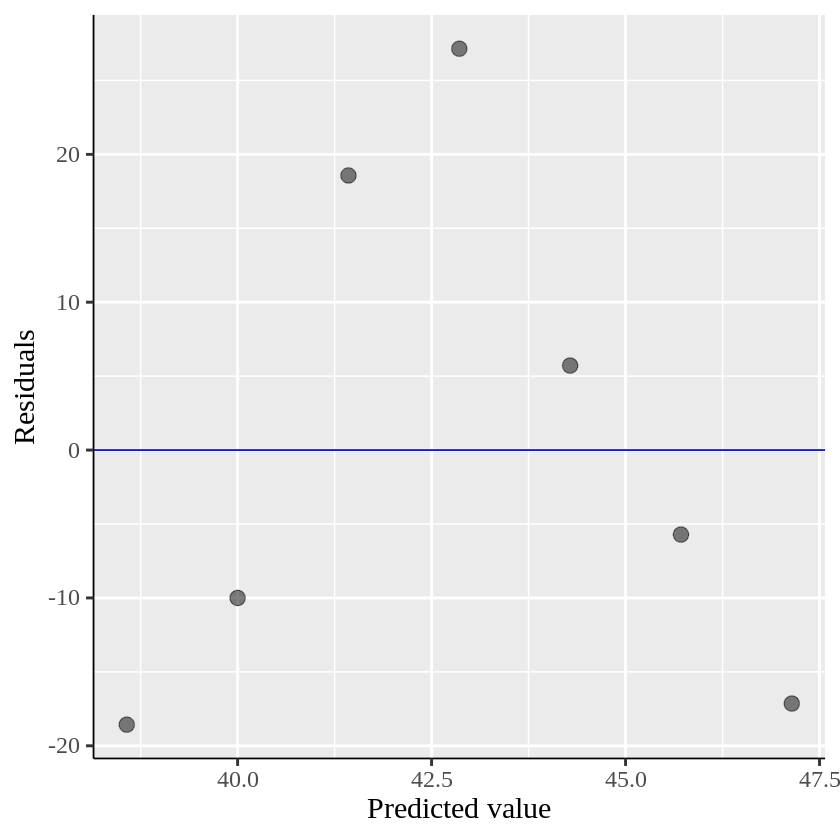

In [22]:
library(ggplot2)

ggplot(data=dataB, aes(x=prediction, y=residual))+
  geom_point(alpha=0.5, size=4) +
  geom_hline(yintercept=0, linetype="solid", color = "Blue") +
  labs(y="Residuals", x="Predicted value") +
  theme_grey(base_size=18, base_family="serif")+
  theme(legend.position="bottom",
        legend.title=element_blank(),
        legend.key=element_rect(color=alpha("grey",.05), fill=alpha("grey",.05)),
        legend.background= element_rect(fill=alpha("grey",.05)),
        axis.line=element_line(linewidth=0.5, colour="black"))

If the residual plot exhibits non-random patterns or lacks random dispersion, it suggests that a linear regression model may not be suitable for the data.

# Non linear model

In [26]:
model= lm(y ~ poly(x,2, raw=TRUE), data=dataB)

In [27]:
model_prediction=predict(model)
model_prediction

1        2        3        4        5        6        7 
25.71429 45.71429 57.14286 60.00000 54.28571 40.00000 17.14286

In [28]:
dataB$prediction=model_prediction
dataB

x,y,prediction,residual
<dbl>,<dbl>,<dbl>,<dbl>
10,30,25.71429,-17.142857
20,40,45.71429,-5.714286
30,50,57.14286,5.714286
40,70,60.00000,27.142857
50,60,54.28571,18.571429
60,30,40.00000,-10.000000
70,20,17.14286,-18.571429


In [29]:
dataB$residual= dataB$y - dataB$prediction
dataB

x,y,prediction,residual
<dbl>,<dbl>,<dbl>,<dbl>
10,30,25.71429,4.285714
20,40,45.71429,-5.714286
30,50,57.14286,-7.142857
40,70,60.00000,10.000000
50,60,54.28571,5.714286
60,30,40.00000,-10.000000
70,20,17.14286,2.857143


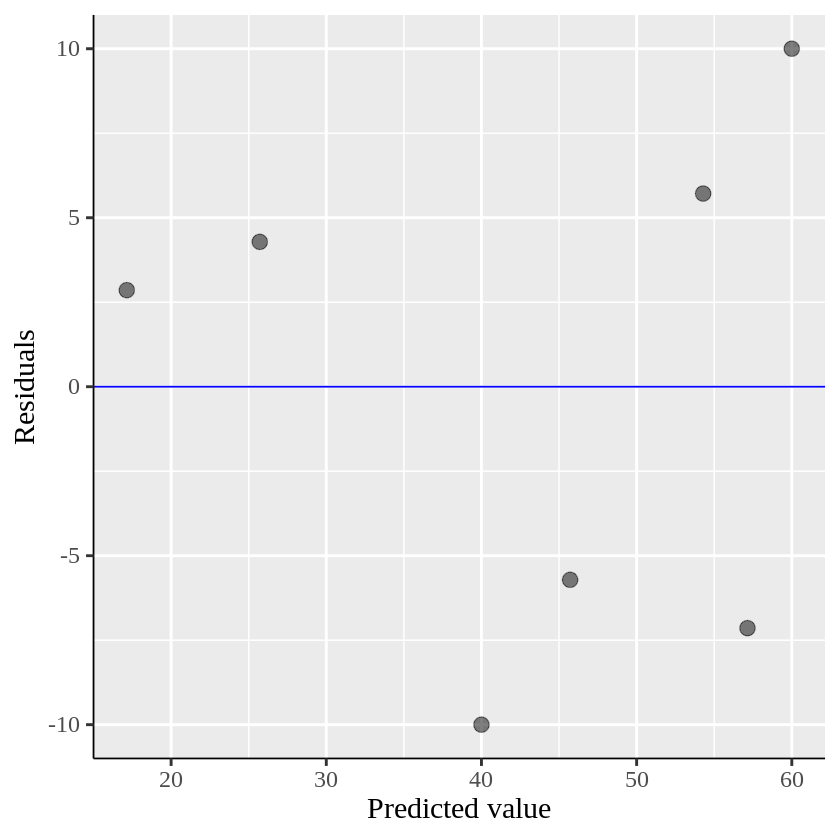

In [30]:
library(ggplot2)

ggplot(data=dataB, aes(x=prediction, y=residual))+
  geom_point(alpha=0.5, size=4) +
  geom_hline(yintercept=0, linetype="solid", color = "Blue") +
  labs(y="Residuals", x="Predicted value") +
  theme_grey(base_size=18, base_family="serif")+
  theme(legend.position="bottom",
        legend.title=element_blank(),
        legend.key=element_rect(color=alpha("grey",.05), fill=alpha("grey",.05)),
        legend.background= element_rect(fill=alpha("grey",.05)),
        axis.line=element_line(linewidth=0.5, colour="black"))